In [1]:
import h2o

In [3]:
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 1 hour 6 mins
H2O cluster version:,3.14.0.6
H2O cluster version age:,23 days
H2O cluster name:,H2O_started_from_R_avkashchauhan_hwc594
H2O cluster total nodes:,1
H2O cluster free memory:,3.308 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
df_train = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/plano-tx/house_price_train.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
df_test = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/plano-tx/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
print(df_train.shape)
print(df_test.shape)

(407, 14)
(99, 14)


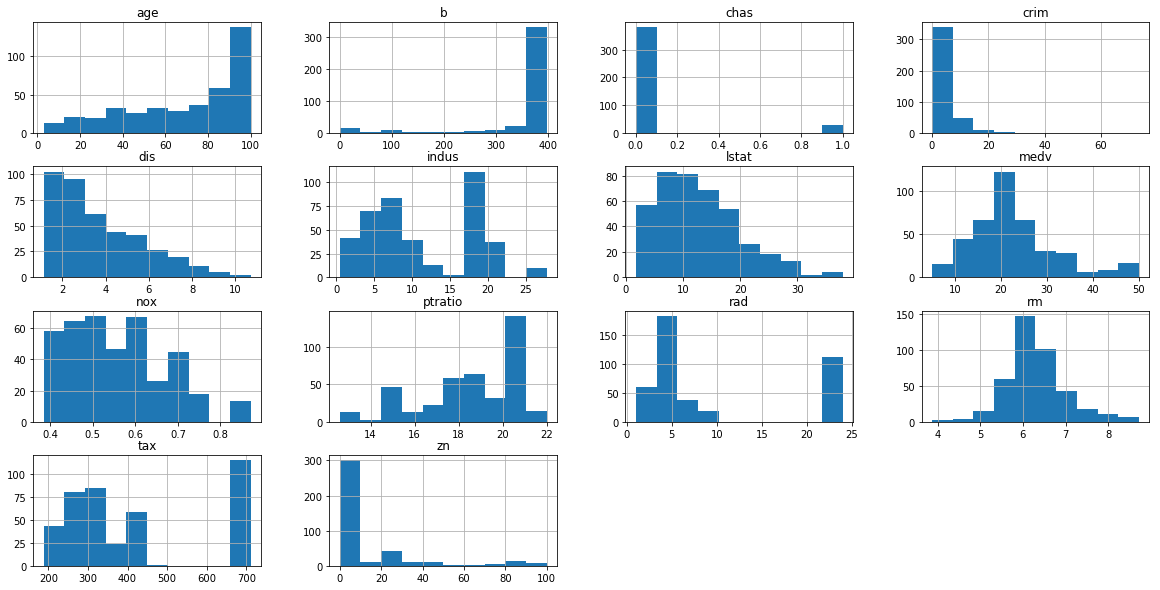

In [10]:
import pylab as pl
df_train.as_data_frame().hist(figsize=(20,10))
pl.show()

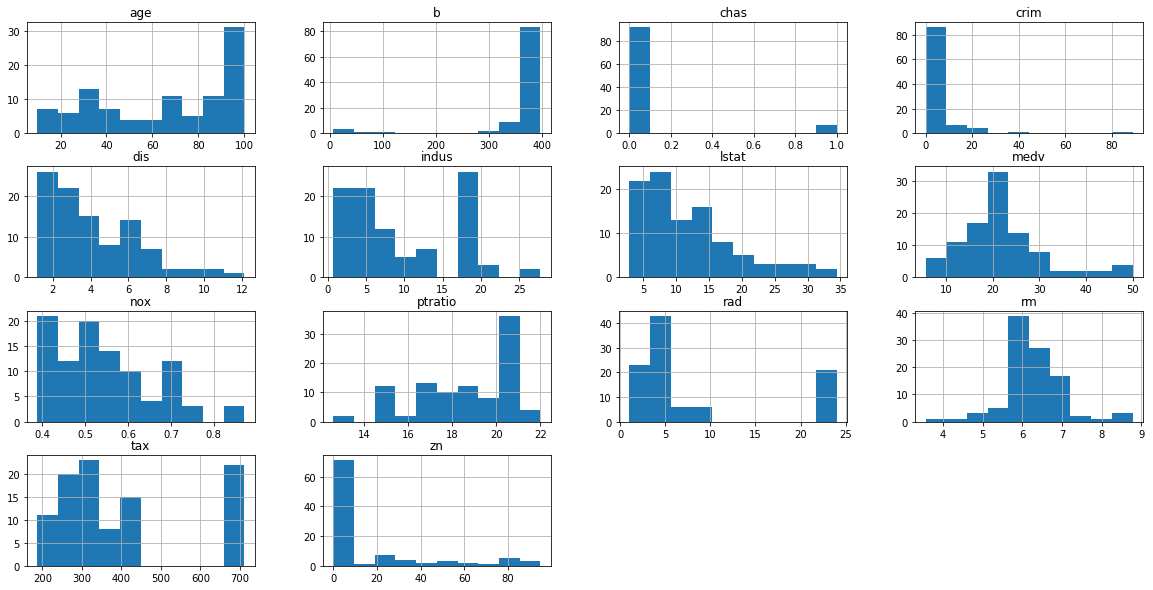

In [12]:
import pylab as pl
df_test.as_data_frame().hist(figsize=(20,10))
pl.show()

In [15]:
df_train.col_names

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [23]:
response = "medv"

In [24]:
features= df_train.col_names

In [25]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [13]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [29]:
h2o_glm = H2OGeneralizedLinearEstimator(nfolds = 5)

In [30]:
h2o_glm.train(x = features, y = response, training_frame= df_frain)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [31]:
h2o_glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1509561268558_89


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 25.2027105951
RMSE: 5.02023013368
MAE: 3.38988113704
RMSLE: NaN
R^2: 0.700528512979
Mean Residual Deviance: 25.2027105951
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34378.5416033
Residual deviance: 10257.5032122
AIC: 2498.3852477
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,3.3872714,0.1726559,3.3733225,3.0178335,3.2435029,3.6208007,3.6808975
mean_residual_deviance,25.211752,5.9864745,21.066692,16.991312,19.965937,27.271156,40.76366
mse,25.211752,5.9864745,21.066692,16.991312,19.965937,27.271156,40.76366
null_deviance,6875.7085,1079.4703,6483.498,7015.766,4372.7446,9095.571,7410.9614
r2,0.6901283,0.0681106,0.7332527,0.8122768,0.6025841,0.7485414,0.5539866
residual_deviance,2051.5007,478.6391,1727.4688,1308.331,1697.1046,2263.5059,3261.093
rmse,4.9574094,0.5638462,4.5898466,4.122052,4.468326,5.2221794,6.3846426
rmsle,0.2608806,0.0446375,0.3523638,0.2074993,NaN,0.2395448,0.2441144


Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2017-11-02 12:46:05,0.000 sec,0,34252.0193612,84.1572957


In [33]:
h2o_glm_pred= h2o_glm.predict(df_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [34]:
h2o_glm_pred

predict
30.1893
25.7295
16.194
14.0706
11.6645
14.4757
22.9229
22.6934
30.3847
21.0683


In [36]:
h2o_glm.model_performance(df_train)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345


In [37]:
h2o_glm.model_performance(df_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 24.9481243387
RMSE: 4.99480973999
MAE: 3.78642958789
RMSLE: 0.259648815062
R^2: 0.707592977773
Mean Residual Deviance: 24.9481243387
Null degrees of freedom: 98
Residual degrees of freedom: 85
Null deviance: 8468.5597644
Residual deviance: 2469.86430954
AIC: 629.412895189


In [65]:
h2o_glm.model_performance(df_train)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345


In [66]:
h2o_glm.model_performance(train=True)


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 21.4904862593
RMSE: 4.63578324119
MAE: 3.17657880157
RMSLE: NaN
R^2: 0.744639059652
Mean Residual Deviance: 21.4904862593
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34252.0194968
Residual deviance: 8746.62790752
AIC: 2433.53337345


In [67]:
h2o_glm.model_performance(valid==True)

NameError: name 'valid' is not defined

In [69]:
h2o_glm.model_performance(xval=True)


ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 25.2027105951
RMSE: 5.02023013368
MAE: 3.38988113704
RMSLE: NaN
R^2: 0.700528512979
Mean Residual Deviance: 25.2027105951
Null degrees of freedom: 406
Residual degrees of freedom: 393
Null deviance: 34378.5416033
Residual deviance: 10257.5032122
AIC: 2498.3852477


In [70]:
h2o_glm.model_performance(test_data=df_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 24.9481243387
RMSE: 4.99480973999
MAE: 3.78642958789
RMSLE: 0.259648815062
R^2: 0.707592977773
Mean Residual Deviance: 24.9481243387
Null degrees of freedom: 98
Residual degrees of freedom: 85
Null deviance: 8468.5597644
Residual deviance: 2469.86430954
AIC: 629.412895189


In [42]:
df_train.col_names

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [71]:
print(h2o_glm.r2(train=True))
print(h2o_glm.r2(valid=True))
print(h2o_glm.r2(xval=True))

0.744639059652
None
0.700528512979


In [72]:
h2o_glm.varimp()

Variable importance does not apply to GLM. Will use std_coef_plot() instead.


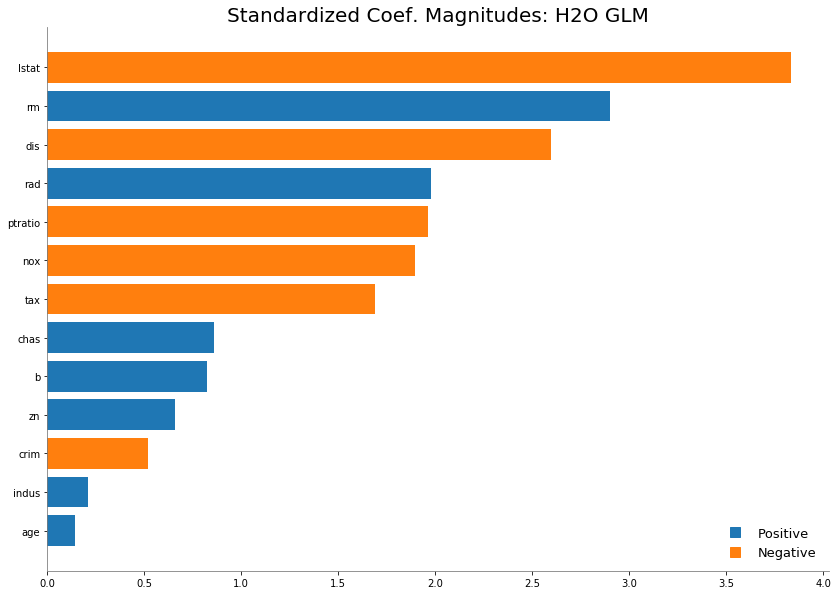

In [73]:
h2o_glm.varimp_plot()

In [47]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well

glm_pdp_rm = h2o_glm.partial_plot(data=df_train, cols=['rm'], server=True, plot=True)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


In [48]:
glm_pdp_rm

PartialDependence: Partial Dependence Plot of model GLM_model_python_1509561268558_89 on column 'rm'



rm,mean_response,stddev_response
3.863,12.4446473,5.7050493
4.1188947,13.5195238,5.7050493
4.3747895,14.5944002,5.7050493
4.6306842,15.6692766,5.7050493
4.8865789,16.7441531,5.7050493
5.1424737,17.8190295,5.7050493
5.3983684,18.8939059,5.7050493
5.6542632,19.9687824,5.7050493
5.9101579,21.0436588,5.7050493
6.1660526,22.1185352,5.7050493


[]

In [53]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [54]:
h2o_gbm = H2OGradientBoostingEstimator(nfolds=5)

In [56]:
h2o_gbm.train(x=features, y= response, training_frame=df_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [74]:
h2o_gbm.varimp()

[(u'lstat', 105866.8125, 1.0, 0.6047348824410893),
 (u'rm', 39758.8984375, 0.37555582810713223, 0.22711170956043256),
 (u'dis', 11466.9921875, 0.108315268181896, 0.06550202097055394),
 (u'nox', 6184.43994140625, 0.05841717338383311, 0.035326902478813045),
 (u'crim', 3648.995849609375, 0.03446779744699856, 0.02084387943711395),
 (u'ptratio', 2454.009033203125, 0.023180154150793244, 0.014017847795346278),
 (u'tax', 2219.060546875, 0.020960870498249864, 0.012675769556622028),
 (u'age', 1424.7196044921875, 0.013457660345560962, 0.008138316647004916),
 (u'b', 1419.9967041015625, 0.013413048627506023, 0.008111338384931468),
 (u'indus', 331.3314514160156, 0.0031297008343952513, 0.0018926392661637913),
 (u'rad', 159.52056884765625, 0.0015068043051514018, 0.0009112171243374602),
 (u'zn', 107.55658721923828, 0.0010159613261166078, 0.00061438725311382),
 (u'chas', 20.848114013671875, 0.0001969277578246901, 0.00011908908447750126)]

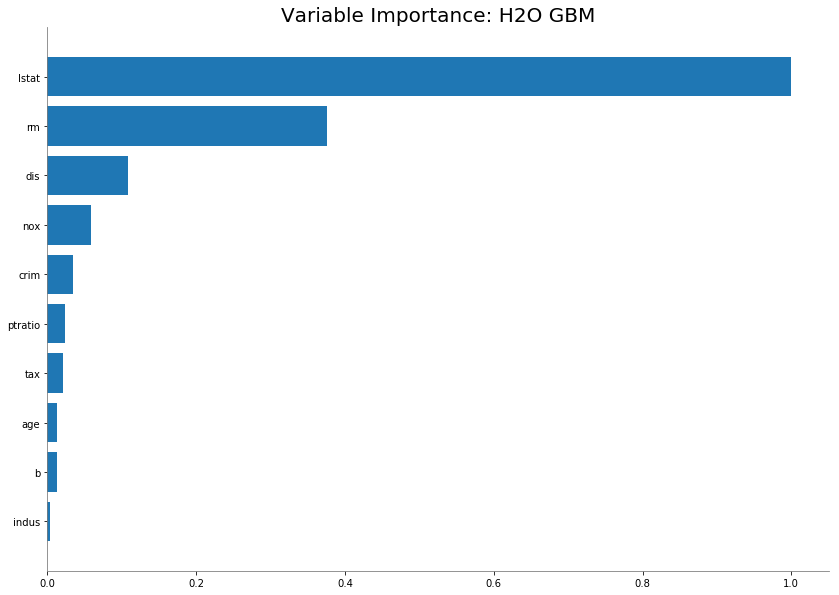

In [75]:
h2o_gbm.varimp_plot()

In [78]:
gbm_pdp_rm = h2o_gbm.partial_plot(data=df_train, cols=['crim'], server=True, plot=True)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


In [81]:
gbm_pdp_rm

PartialDependence: Partial Dependence Plot of model GBM_model_python_1509561268558_90 on column 'crim'



crim,mean_response,stddev_response
0.00906,22.8993318,8.2965720
3.8787989,23.4596904,8.7641119
7.7485379,23.2171674,9.0284235
11.6182768,23.1067477,9.2912809
15.4880158,23.1991001,9.2240590
19.3577547,22.2976683,9.4920710
23.2274937,22.2604637,9.5283416
27.0972326,22.2604637,9.5283416
30.9669716,22.2604637,9.5283416
34.8367105,22.2604637,9.5283416


[]

In [83]:
## Can we build a logistic regression/Classfication model? 
df_train[response] = df_train[response].asfactor()
df_test[response] = df_test[response].asfactor()

H2OValueError: Only 'int' or 'string' are allowed for asfactor(), got medv:real 